<a href="https://colab.research.google.com/github/wgova/time_series_trade/blob/master/clustering_tsfresh_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tslearn
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from matplotlib import pyplot as plt
import os, sys
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import homogeneity_score
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram

In [0]:
PATH = '/content/drive/My Drive/Stellenbosch/Webster/min_feats_ts'
engines = pd.read_csv(f'{PATH}/107188_dict_expval.csv')
y = engines.id
X = engines.drop(columns=['id'])
X.fillna(0,inplace=True)
data = X

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

For 2 clusters: average silhouette_score is 0.31003035010123436
For 3 clusters: average silhouette_score is 0.39404899618493244
For 4 clusters: average silhouette_score is 0.4074793236033457
For 5 clusters: average silhouette_score is 0.3685231898400428
For 6 clusters: average silhouette_score is 0.3743057704657388
For 7 clusters: average silhouette_score is 0.36518829089597676
For 8 clusters: average silhouette_score is 0.361158176647374
For 9 clusters: average silhouette_score is 0.35275533480465876


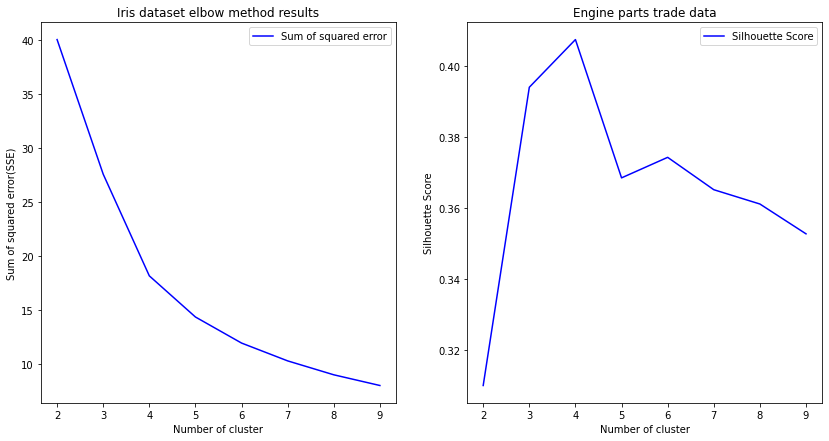

In [87]:
range_n_clusters = range(2,10)
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   cluster_labels = clusterer.fit_predict(X)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(X, cluster_labels)
   ss.append(silhouette_avg)
   print(f"For {n_clusters} clusters: average silhouette_score is {silhouette_avg}")
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

fig = plt.figure(figsize=(14,7))

fig.add_subplot(121)
plt.title("Iris dataset elbow method results")
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared error(SSE)")
plt.legend()

fig.add_subplot(122)
plt.title("Engine parts trade data")
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

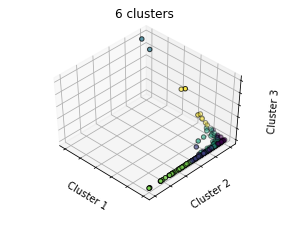

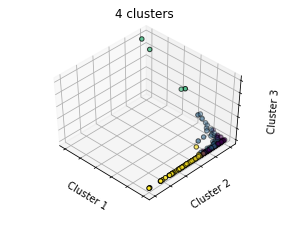

In [88]:
estimators = [
              ('k_means_6', KMeans(n_clusters=6,random_state=42)),
              ('k_means_4', KMeans(n_clusters=4,random_state=42))
              ]
fignum = 1
titles = ['6 clusters', '4 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Cluster 1')
    ax.set_ylabel('Cluster 2')
    ax.set_zlabel('Cluster 3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

In [76]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,n_init=1,init='random',n_jobs = 4, max_iter=10000, random_state=21,algorithm="auto")
fitted_model = model.fit(X)
labels = model.labels_
centroids = pd.DataFrame(fitted_model.cluster_centers_)
print(f'Cluster centers: \n {centroids}')

Cluster centers: 
           0         1         2  ...         7         8         9
0  0.139692  0.846863  0.064514  ...  0.058383  0.050978  0.015018
1  0.138324  0.320430  0.003567  ...  0.003604  0.002307  0.000149
2  0.062711  1.000000  0.956415  ...  0.934383  0.946280  0.877377
3  0.522497  0.580303  0.002837  ...  0.001898  0.000557  0.000110

[4 rows x 10 columns]


In [0]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

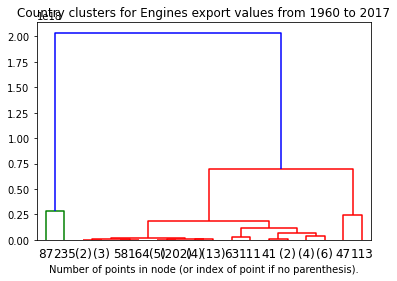

In [106]:
# setting distance_threshold=0 ensures we compute the full tree.
hc_model = AgglomerativeClustering(distance_threshold=6, n_clusters=None,linkage='ward')

hc_model = model.fit(X)
plt.title('Country clusters for Engines export values from 1960 to 2017')
# plot the top three levels of the dendrogram
plot_dendrogram(hc_model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [0]:
# scaler = MinMaxScaler()
# engines_scaled = scaler.fit_transform(engines.index.values)
eng_feat_vals = preprocessing.scale(data)
clusters = AgglomerativeClustering(n_clusters=50,linkage='ward')
# clusters.fit(eng_feat_vals)
# engines['eng_labels'] = clusters.fit_predict()